In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
df=sns.load_dataset('tips') # preloaded dataset
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [55]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [56]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

# Correlation
 relationship btwn 2 numerical columns
range is from -1 to +1
 -ve correlation one value increase othere decrease
+ve correlation One value increase other also increse


In [58]:
correlation = df.corr(numeric_only=True)
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# heatmap
 visual representation of Corellation

 ### cmap

 1. Diverging Colormaps (Best for Correlation Heatmaps)

'coolwarm' → Blue (negative) to red (positive)

'RdBu' → Red to blue

'RdYlGn' → Red to yellow to green

'Spectral' → Multi-color spectrum


2. Sequential Colormaps (Best for Gradient Values)

'Blues' → Light blue to dark blue

'Greens' → Light green to dark green

'Oranges' → Light orange to dark orange

'Purples' → Light purple to dark purple

3. Perceptually Uniform Colormaps (Best for Clarity)

'viridis' → Yellow to green to blue (default in Matplotlib)

'plasma' → Yellow to purple

'inferno' → Yellow to dark red

'magma' → Yellow to dark purple

4. Other Fun Colormaps

'cividis' → Blue to yellow (colorblind-friendly)

'twilight' → Purple to orange

'cool' → Cyan to magenta

'hot' → Black to red to yellow

<Axes: >

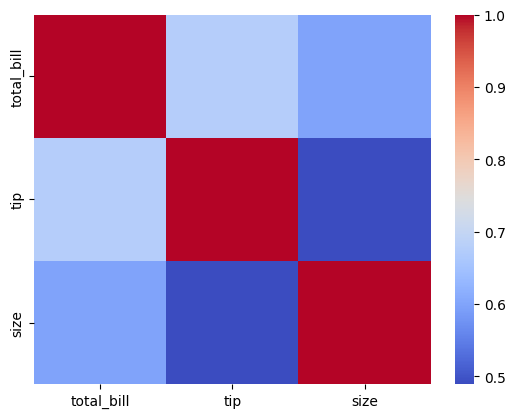

In [59]:
sns.heatmap(correlation,cmap='coolwarm')
#cmap : changes color pallet

# joinplot 
:- Neumerical variables relation

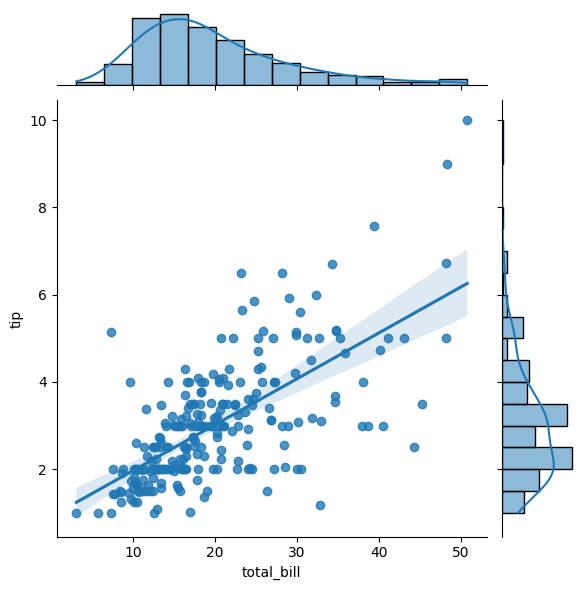

In [60]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='reg')
# kind = hex : give hexagonal plot
# kind = reg : scatterplot with regression line


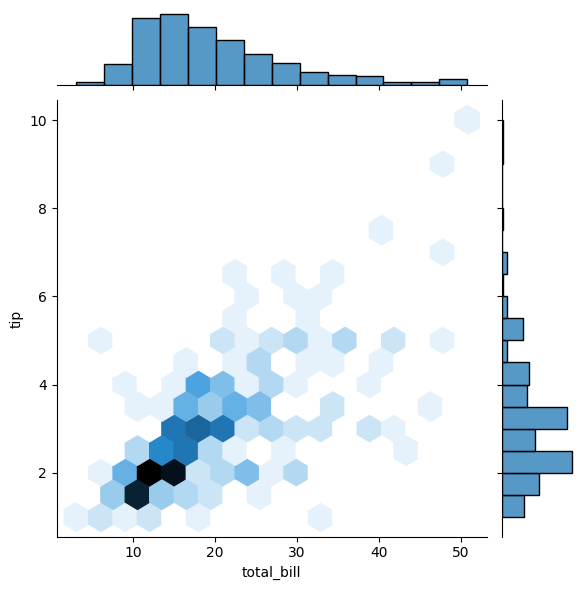

In [61]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')

# pairplot
Numerical variable relation

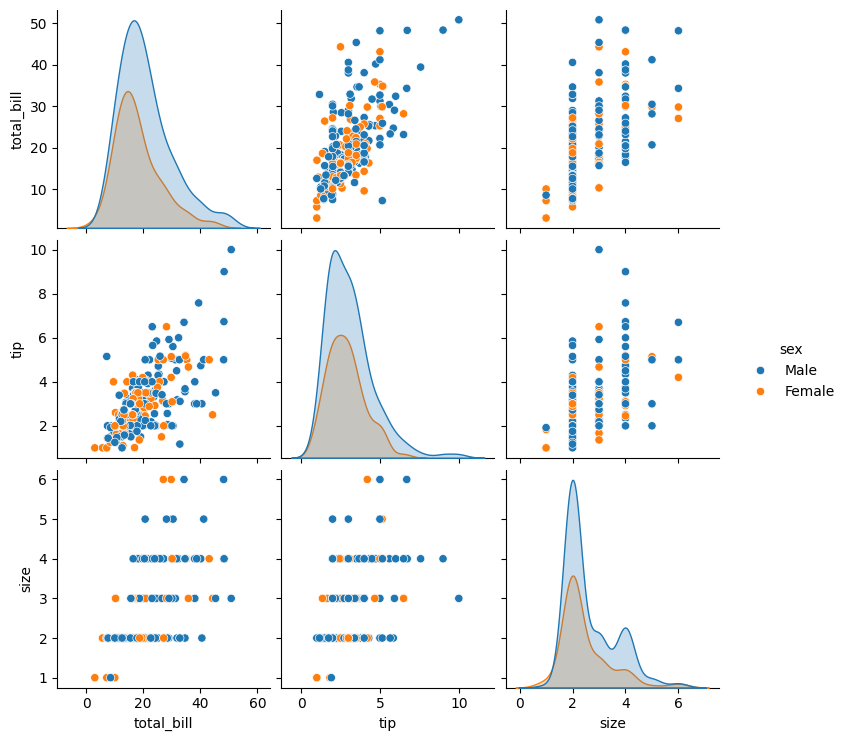

In [62]:
sns.pairplot(df,hue='sex')

# Countplot
only for categorical columns

<Axes: xlabel='sex', ylabel='count'>

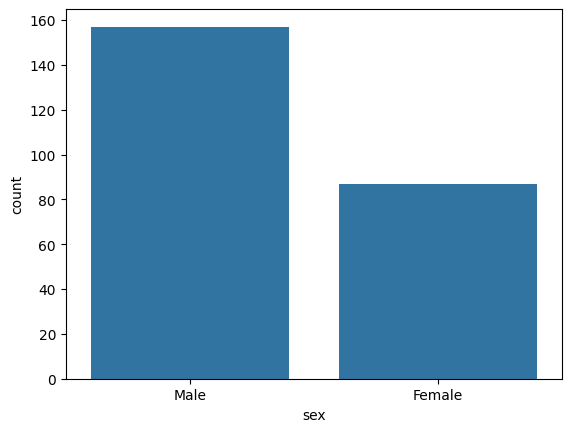

In [63]:
sns.countplot(x='sex',data=df)

<Axes: xlabel='day', ylabel='count'>

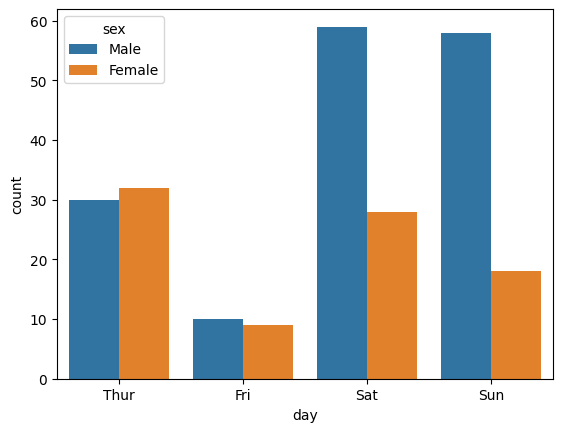

In [64]:
sns.countplot(x='day',data=df,hue='sex')

# barchart

the black line is called error bar
if there is lot of variation length of error bar inreases

<Axes: xlabel='total_bill', ylabel='day'>

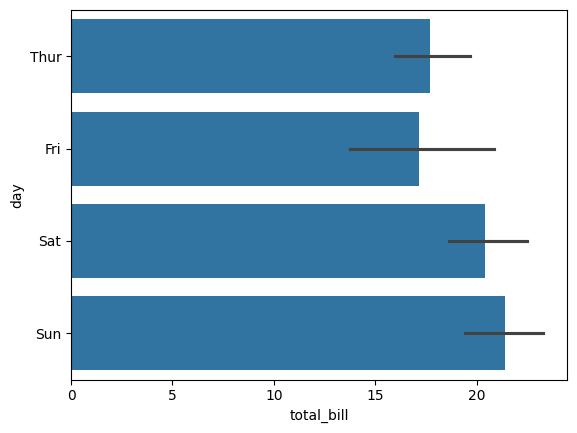

In [65]:
sns.barplot(x='total_bill',y='day',data=df)

# Box plot
Box in box plot is called IQR

Interquartile Range (IQR)
Q1 (First Quartile): The median of the lower half of the data (25th percentile).
Q2 (Second Quartile): the middle part of the data (50th percentile)
Q3 (Third Quartile): The median of the upper half of the data (75th percentile).

### How IQR Relates to a Box Plot
The box in a box plot extends from Q1 to Q3, representing the IQR.
The whiskers typically extend to the lowest and highest values within 1.5 × IQR from Q1 and Q3, respectively.
Data points beyond this range are considered outliers.
Circles represents outliners


#### Black vertical line is called visscer
#### represents the total range



<Axes: xlabel='smoker', ylabel='total_bill'>

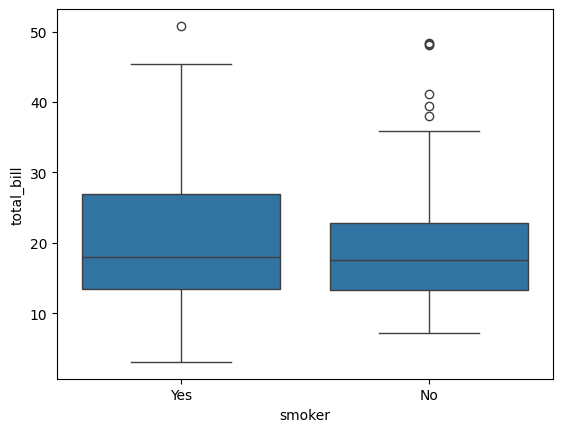

In [66]:
sns.boxplot(x='smoker',y='total_bill',data=df)

<Axes: ylabel='total_bill'>

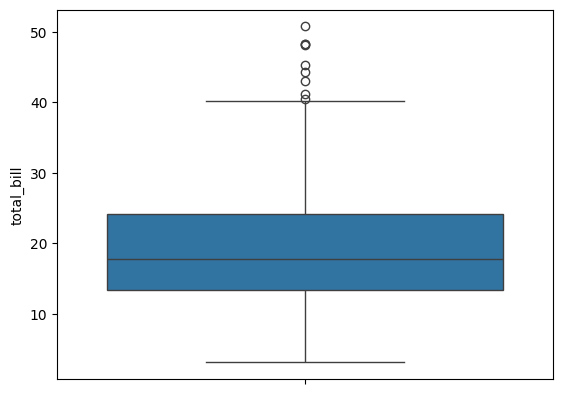

In [67]:
sns.boxplot(y='total_bill',data=df)

<Axes: ylabel='tip'>

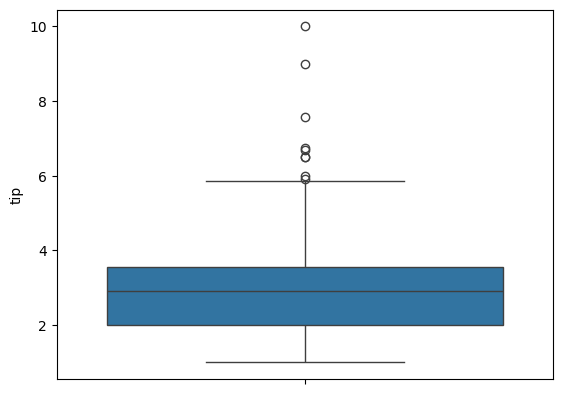

In [68]:
sns.boxplot(y='tip',data=df)

<Axes: xlabel='time', ylabel='total_bill'>

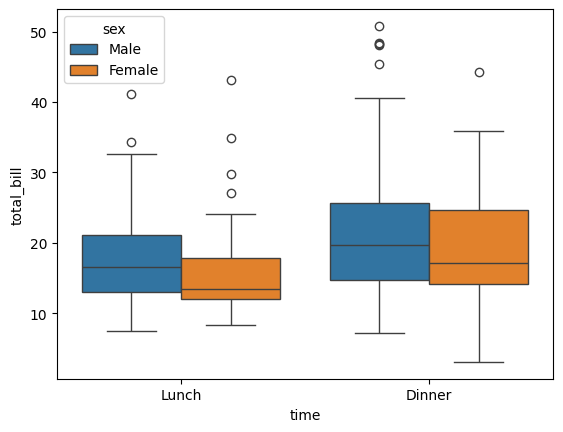

In [69]:
sns.boxplot(x='time',y='total_bill',data=df,hue='sex')

<Axes: xlabel='smoker', ylabel='tip'>

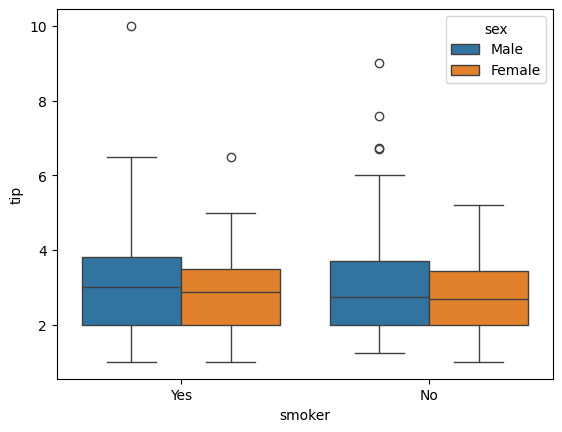

In [70]:
sns.boxplot(x='smoker',y='tip',data=df,hue='sex')

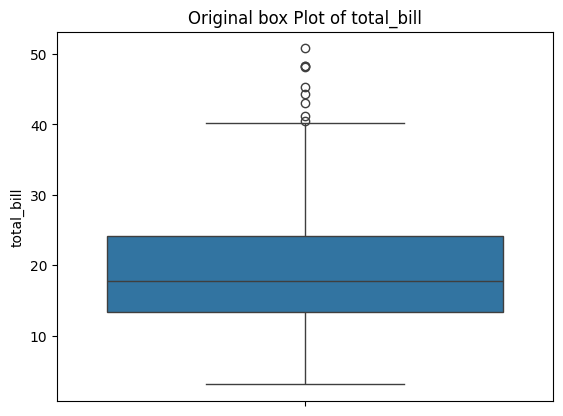

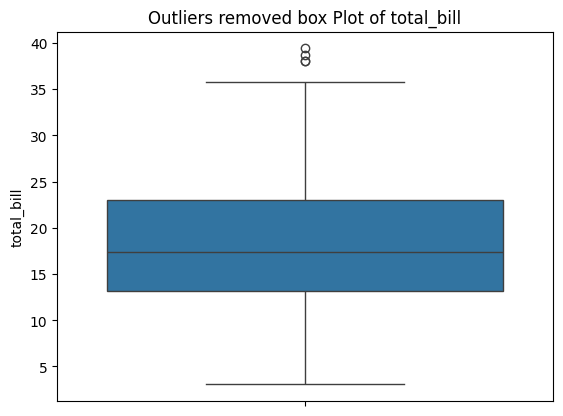

In [71]:
import matplotlib.pyplot as plt
def removal_boxplot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original box Plot of {column}')
    plt.show()
    
    removed_outliers=df[df[column] <= threshold]
    
    sns.boxplot(removed_outliers[column])
    plt.title(f'Outliers removed box Plot of {column}')
    plt.show()
    return removed_outliers

threshold_value=40

no_outliers=removal_boxplot(df,'total_bill',threshold_value)

In [72]:
Q1=np.percentile(df['total_bill'],25,method='midpoint')
Q3=np.percentile(df['total_bill'],75,method='midpoint')
IQR=Q3-Q1
print(IQR)

10.849999999999998


In [74]:
upper=Q3+1.5*IQR
upper_array=np.array(df['total_bill'] >= upper)
print("Upper bound:",upper)
print(upper_array.sum())

#lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['total_bill'] <= lower)
print("Upper bound:",lower)
print(lower_array.sum())

Upper bound: 40.449999999999996
9
Upper bound: -2.9499999999999993
0
